# Image Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile

## Cat & Dog Image Classification Using CNNs & TensorFlow

### Import Data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Extract Data and Build Directory Structure

In [3]:
local_zip = "cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('cats_and_dogs_filtered')
zip_ref.close()


In [4]:
base_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

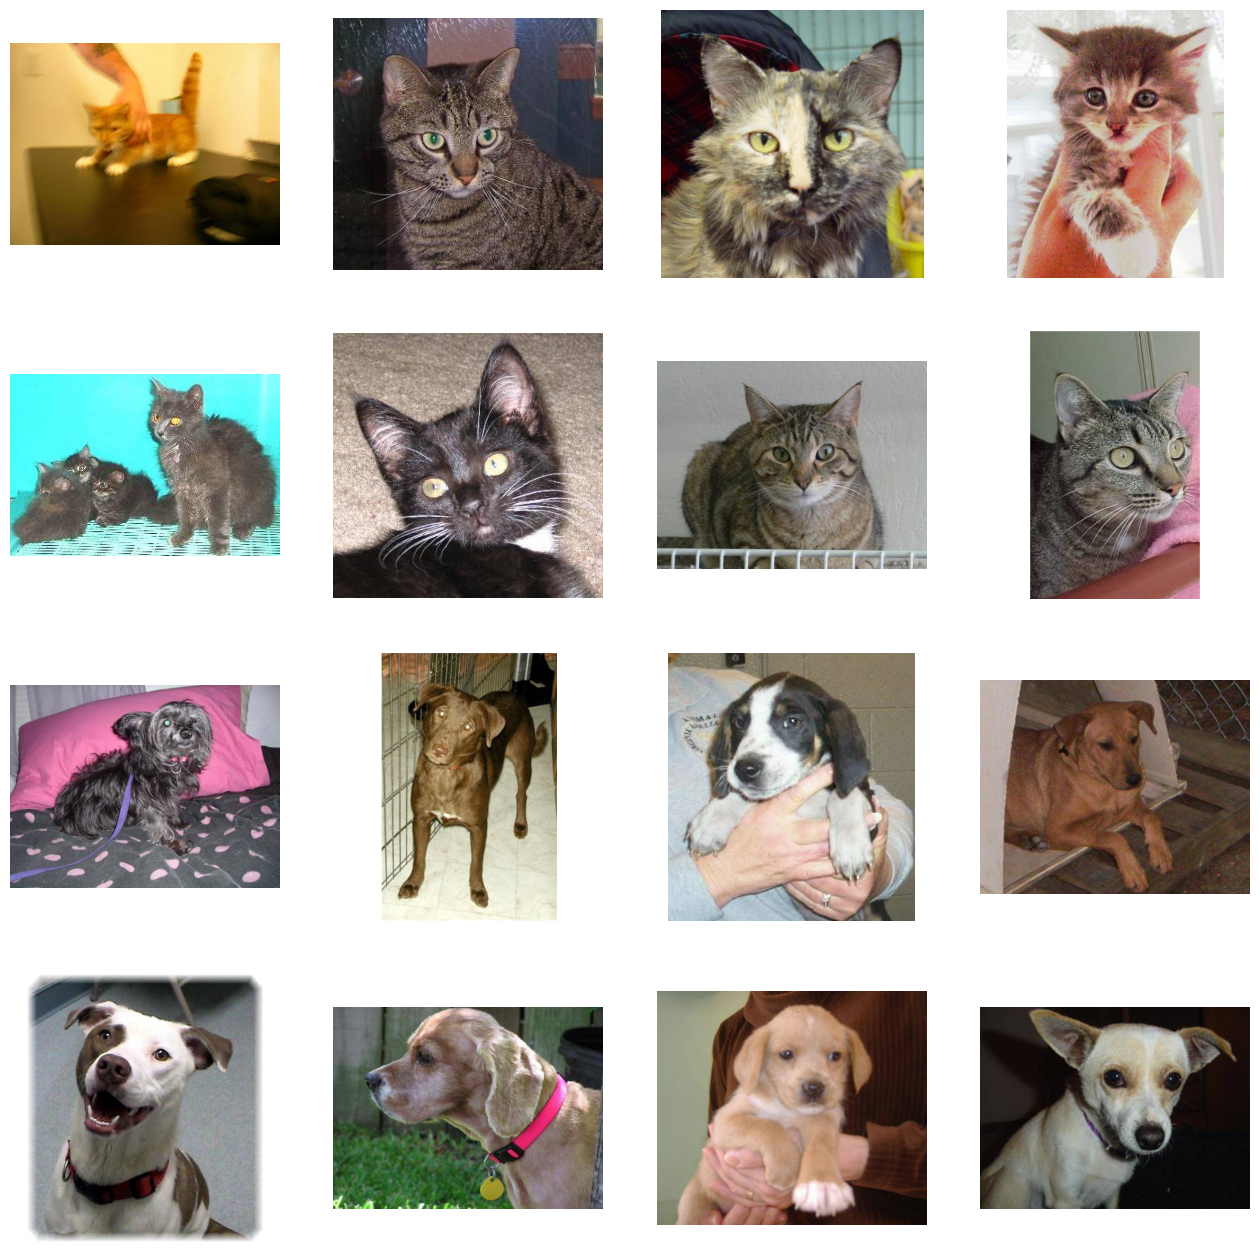

In [7]:
nrows= 4
ncols = 4
pic_index =0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index=8
next_cat = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i,  img_path in enumerate(next_cat+next_dog):
  sp = plt.subplot(nrows,ncols, i+1)
  sp.axis("Off")
  img =mpimg.imread(img_path)
  plt.imshow(img)


### Build CNN Model Using Keras Layers Objects

#### Build CNN Architecture

In [8]:
import tensorflow as tf
import tensorflow.keras as keras

KeyboardInterrupt: 

In [ ]:
img_input = keras.layers.Input(shape=(150,150,3))

#Embedding Layers
L = keras.layers.Conv2D(16,3, activation='relu')(img_input)
L = keras.layers.MaxPooling2D(2)(L)

L = keras.layers.Conv2D(32,3, activation='relu')(L)
L = keras.layers.MaxPooling2D(2)(L)

L = keras.layers.Conv2D(64,3, activation='relu')(L)
L = keras.layers.MaxPooling2D(2)(L)

#Fully Connected Layer
F = keras.layers.Flatten()(L)
##Classifier
F = keras.layers.Dense(512, activation='relu')(F)
output = keras.layers.Dense(1, activation='sigmoid')(F)

In [ ]:
my_cnn_model = keras.Model(img_input,output)

In [ ]:
my_cnn_model.summary()

#### Train CNN

In [ ]:
from keras.optimizers import RMSprop

##### Model Compile



In [ ]:
my_cnn_model.compile(loss='binary_crossentropy',
                     optimizer=RMSprop(learning_rate=.001),
                     metrics=['acc'])

##### Preprocess Image Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

#Fetch Data and Resize
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size =(150,150),
                                                    batch_size  =20,
                                                    class_mode  ='binary')
validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                        target_size =(150,150),
                                                        batch_size  =20,
                                                        class_mode  ='binary')


##### Model Fit

In [ ]:
history = my_cnn_model.fit(train_generator,
                           steps_per_epoch=100,
                           epochs=15,
                           validation_data=validation_generator,
                           verbose=2)

#### Feature Mapping

In [ ]:
model = my_cnn_model

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import Model

In [ ]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Improved Model

In [ ]:
# Improved CNN with Image Augmentation and Transfer Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
#mage Preprocessing and Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Constants 
BATCH_SIZE = 20
IMG_SHAPE = 150

In [ ]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2, 
    horizontal_flip = True,
    fill_mode = 'nearest'
)
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)



In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size = BATCH_SIZE,
    directory = validation_dir,
    shuffle=True,
    target_size = (IMG_SHAPE,IMG_SHAPE),
    class_mode = 'binary'
)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,len(images_arr), figsize=(20,20))
  axes =axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
augmented_images = [train_data_gen[0][0][12] for i in range(6)]

In [ ]:
plotImages(augmented_images)

In [ ]:
## Transfer Learning

In [ ]:
from keras.applications import vgg16

In [ ]:
#vgg16 Pre-Trained Model 

In [ ]:
vgg = vgg16.VGG16(include_top = False, weights='imagenet', input_shape =(150,150,3))

In [ ]:
vgg.summary()

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, InputLayer

In [ ]:
output = vgg.layers[-1].output
output = Flatten()(output)
vgg_model = keras.Model(vgg.input, output)
vgg_model.trainable = False

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
#Build CUstomer Classified

In [ ]:
model = keras.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))


model.add(Dense(1, activation = 'sigmoid'))



In [ ]:
model.summary()

In [ ]:
#Model Compiler

In [ ]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = keras.optimizers.RMSprop(learning_rate=0.0005), 
    metrics = ['binary_accuracy']

)

In [ ]:
#Early Stopping Callback

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)


In [ ]:
history = model.fit(
    train_data_gen, 
    steps_per_epoch = 100,
    epochs = 5,
    validation_data = val_data_gen,
    validation_steps = 50,
    callbacks = [callback],
    verbose = 2
)

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
def cat_or_dog(file):
    img = load_img(file, target_size=(IMG_SHAPE,IMG_SHAPE))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    probs = model.predict(img)

    if probs[0][0]==1:
        result = 'dog'
    else:
        result = 'cat'

    plt.imshow(plt.imread(file))
    plt.show()

    print("This is clearly a " + result + "!")
    return probs

In [ ]:
cat_or_dog('image.jpg')

In [ ]:
cat_or_dog('doge.jpg')

In [ ]:
cat_or_dog('dog.jpg')

In [ ]:
#Time Series Analysis using ARIMA

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
DF =pd.read_csv("Electric_Production.csv")

In [ ]:
DF

In [11]:
DF = DF.rename(columns={'DATE':'ds', 'IPG2211A2N': 'ts'})

In [ ]:
DF.head()

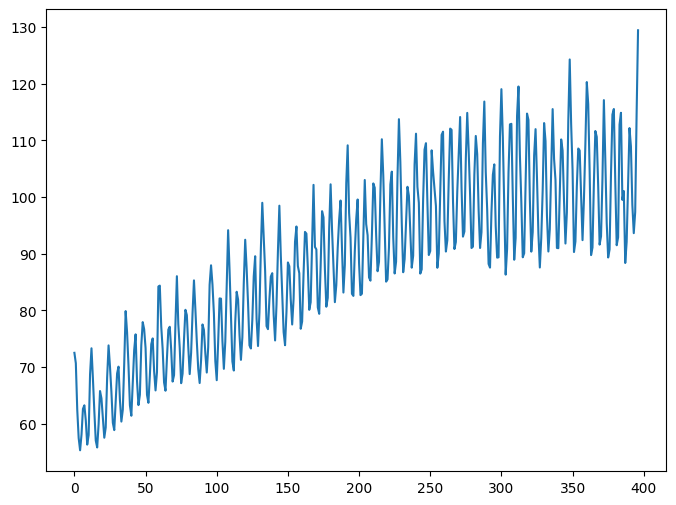

In [12]:
plt.figure(figsize=(8,6))
plt.plot(DF.ts)

In [ ]:
## Signal Decomposition (Trend, Seasonality and Residual)

In [ ]:
#Log Transform

In [13]:
def log_transform(df, ts): return df[ts].apply(lambda x:np.log(x))

In [14]:
DF['ts_log'] = log_transform(DF, ts = 'ts')


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomposition = seasonal_decompose(DF['ts'],period = 4, extrapolate_trend=3)

In [17]:
def plot_decomposition(df, ts, trend,seasonal, residual):
  f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,8), sharex=True )

  ax1.plot(df[ts], label="Original")
  ax1.legend(loc='best')
  ax1.tick_params(axis ='x', rotation=45)

  ax2.plot(df[trend], label="Trend")
  ax2.legend(loc='best')
  ax2.tick_params(axis ='x', rotation=45)

  ax3.plot(df[seasonal], label="Seasonal")
  ax3.legend(loc='best')
  ax3.tick_params(axis ='x', rotation=45)

  ax4.plot(df[residual], label="Residuals")
  ax4.legend(loc='best')
  ax4.tick_params(axis ='x', rotation=45)

  plt.tight_layout()
  plt.show()

In [18]:
decomposition = seasonal_decompose(DF['ts'],period = 12, extrapolate_trend=3)

In [20]:
New_DF = DF.copy()
New_DF.loc[:,'trend']=decomposition.trend
New_DF.loc[:,'seasonal']=decomposition.seasonal
New_DF.loc[:, 'residual'] = decomposition.resid


In [21]:
New_DF

,ds,ts,ts_log,trend,seasonal,residual
0,1/1/1985,72.5052,4.283658,62.675817,13.448741,-3.619358
1,2/1/1985,70.6720,4.258049,62.595373,5.760567,2.316059
2,3/1/1985,62.4502,4.134369,62.514930,-0.535524,0.470794
3,4/1/1985,57.4714,4.051287,62.434487,-9.396372,4.433285
4,5/1/1985,55.3151,4.013046,62.354043,-9.210845,2.171902
...,...,...,...,...,...,...
392,9/1/2017,98.6154,4.591227,102.286848,-2.539751,-1.131698
393,10/1/2017,93.6137,4.539177,102.451102,-8.907714,0.070312
394,11/1/2017,97.3359,4.578168,102.615355,-6.071346,0.791891
395,12/1/2017,114.7212,4.742505,102.779608,6.443348,5.498244


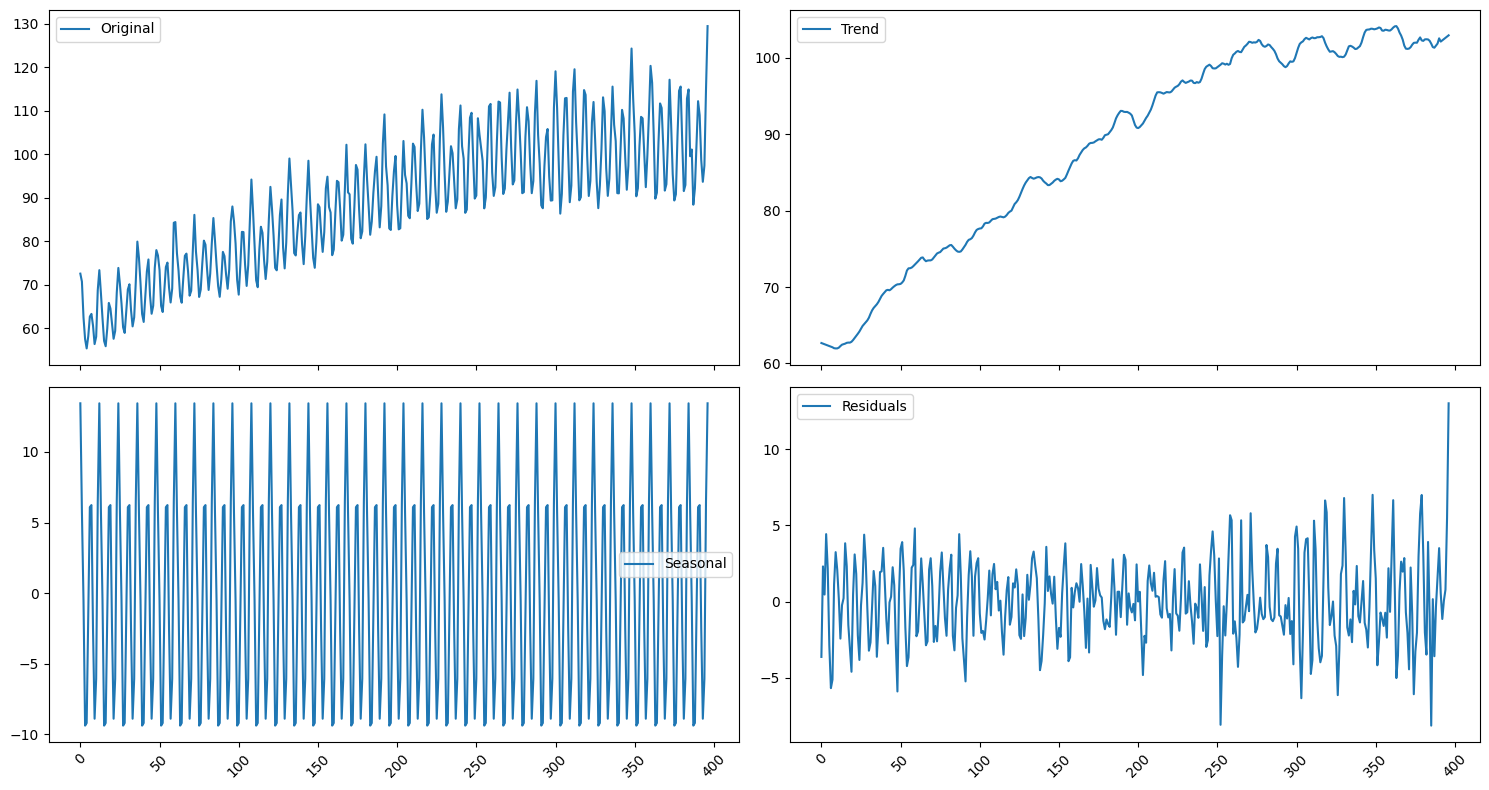

In [23]:
plot_decomposition(New_DF, ts='ts', trend='trend', seasonal='seasonal', residual='residual')


In [24]:
## Stationarity Test

In [ ]:
## Stationairy Test: Dickey Fuller Test

In [25]:
from statsmodels.tsa.stattools import adfuller

In [29]:
dftest = adfuller(New_DF['residual'], autolag = 'AIC')

In [32]:
dftest = adfuller(New_DF['residual'], autolag='AIC')


In [33]:
def test_stationarity(df, ts):

  rolmean = df[ts].rolling(window=12, center= False).mean()
  rolstd =  df[ts].rolling(window=12, center = False).std()

  orig = plt.plot(df[ts], color = 'blue', label ="Original")
  mean = plt.plot(rolmean, color ='red', label ="Rolling Mean")
  std = plt.plot(rolstd, color='black', label ="Rolling Std")
  plt.legend(loc = 'best')
  plt.title("Rolling Mean and Standard Deviation for  %s" %(ts))
  plt.xticks(rotation =45)
  plt.show(block = False)
  plt.close

  print('Results:')
  dftest = adfuller(df[ts], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=["Test Statistic",'p=value','# Lasgs Used',' Number of Observations'])

  for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key]= value

  print(dfoutput)

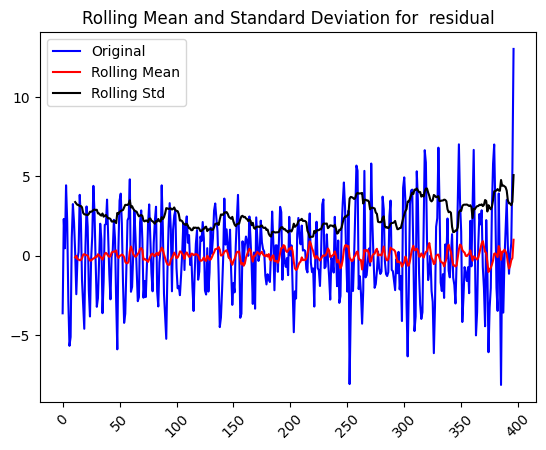

Results:
Test Statistic            -1.120468e+01
p=value                    2.199760e-20
# Lasgs Used               1.400000e+01
 Number of Observations    3.820000e+02
Critical Value(1%)        -3.447585e+00
Critical Value(5%)        -2.869136e+00
Critical Value(10%)       -2.570816e+00
dtype: float64


In [34]:
test_stationarity(df=New_DF, ts='residual')

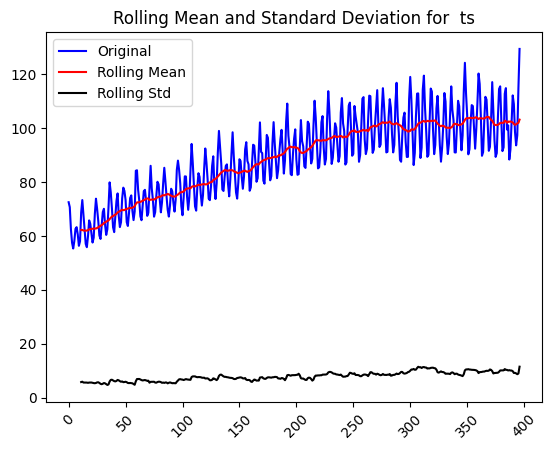

Results:
Test Statistic              -2.256990
p=value                      0.186215
# Lasgs Used                15.000000
 Number of Observations    381.000000
Critical Value(1%)          -3.447631
Critical Value(5%)          -2.869156
Critical Value(10%)         -2.570827
dtype: float64


In [35]:
test_stationarity(df=DF, ts = 'ts')

In [37]:
## Autocorrelation and Partial Autocorrelation  Plots

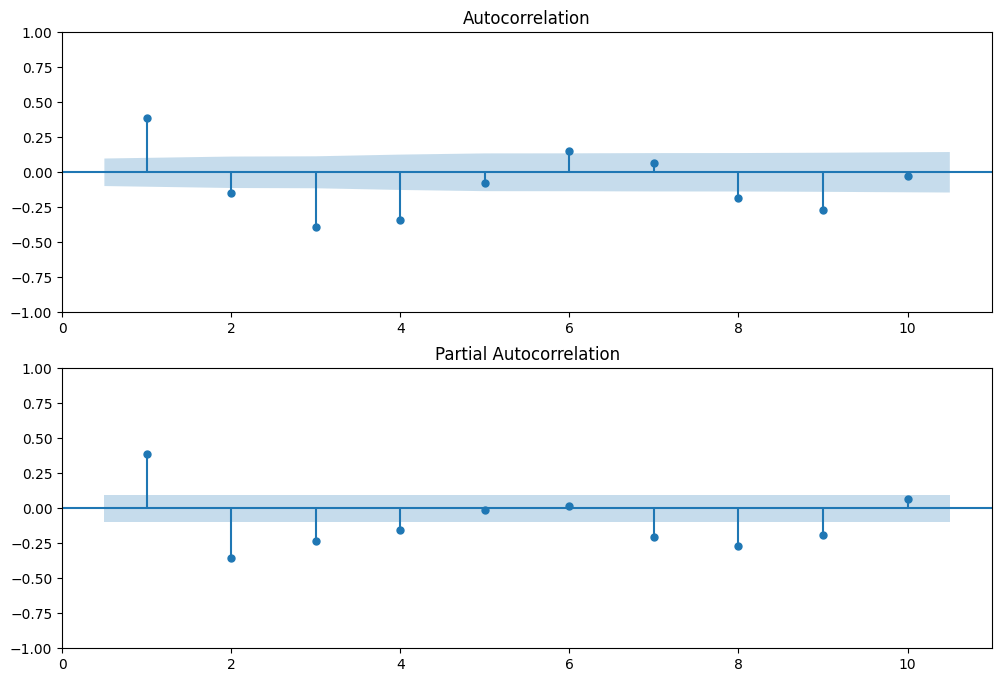

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF of df
plot_acf(New_DF['residual'], lags=10, zero=False, ax=ax1);

# Plot the PACF of df
plot_pacf(New_DF['residual'], lags=10, zero=False, ax=ax2);

In [39]:
##Forecasting using ARIMA

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
def run_Arima(df,ts,p,d,q):
  model =ARIMA(df[ts], order=(p,d,q))
  results_arima=model.fit()

  len_results =len(results_arima.fittedvalues)
  ts_modified =df[ts][-len_results:]

  rss = sum((results_arima.fittedvalues-ts_modified)**2)
  rmse = np.sqrt(rss/len(df[ts]))
  print("RMSE: ",rmse)

  plt.figure()
  plt.plot(df[ts])
  plt.plot(results_arima.fittedvalues, color='red')
  plt.show()

  return results_arima

In [45]:
New_DF = New_DF.fillna(value=0)

RMSE:  1.8387095943123803


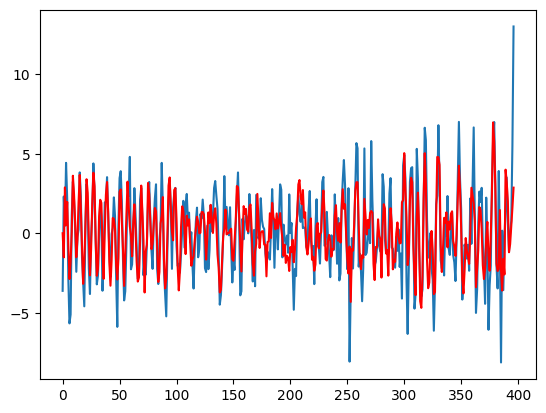

In [46]:
Model_AR = run_Arima(df = New_DF, ts='residual', p=15, d=0, q=0)

In [47]:
my_forecast = Model_AR.forecast(48)

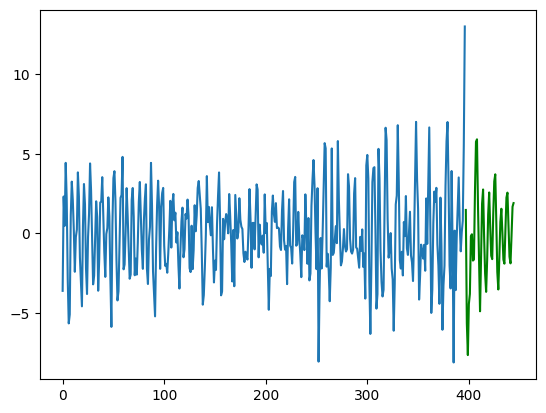

In [49]:
plt.figure()
plt.plot(New_DF['residual'])
plt.plot(my_forecast, color='green')

In [51]:
Model_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               residual   No. Observations:                  397
Model:                ARIMA(15, 0, 0)   Log Likelihood                -803.070
Date:                Thu, 09 Oct 2025   AIC                           1640.139
Time:                        09:31:33   BIC                           1707.866
Sample:                             0   HQIC                          1666.968
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.022      0.270      0.787      -0.038       0.050
ar.L1          0.2078      0.047      4.437      0.000       0.116       0.300
ar.L2         -0.3365      0.052     -6.459      0.000      -0.439      -0.234
ar.L3         -0.2332      0.056     -4.165      0.000      -0.343      -0.123
ar.L4         -0.3770      0.059     -6.434      0.000      -0.492      -0.262
ar.L5         -0.3497      0.058     -6.040      0.000      -0.463      -0.236
ar.L6         -0.2312      0.062     -3.735      0.000      -0.352      -0.110
ar.L7         -0.2946      0.064     -4.571      0.000      -0.421      -0.168
ar.L8         -0.3608      0.064     -5.637      0.000      -0.486      -0.235
ar.L9         -0.4034      0.055     -7.304      0.000      -0.512      -0.295
ar.L10        -0.1926      0.059     -3.248      0.001      -0.309      -0.076
ar.L11        -0.2068      0.051     -4.049      0.000      -0.307      -0.107
ar.L12        -0.0453      0.057     -0.788      0.431      -0.158       0.067
ar.L13        -0.2658      0.049     -5.409      0.000      -0.362      -0.169
ar.L14        -0.0681      0.052     -1.308      0.191      -0.170       0.034
ar.L15        -0.3042      0.061     -4.971      0.000      -0.424      -0.184
sigma2         3.3011      0.174     19.024      0.000       2.961       3.641
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               169.85
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
Model_AR.conf_int(alpha = 0.05)

,0,1
const,-0.037877,0.049968
ar.L1,0.115996,0.299544
ar.L2,-0.438562,-0.234366
ar.L3,-0.342931,-0.123460
ar.L4,-0.491894,-0.262177
ar.L5,-0.463173,-0.236231
ar.L6,-0.352461,-0.109872
ar.L7,-0.420984,-0.168289
ar.L8,-0.486306,-0.235366
ar.L9,-0.511703,-0.295178


In [54]:
from statsmodels.graphics.tsaplots import plot_predict

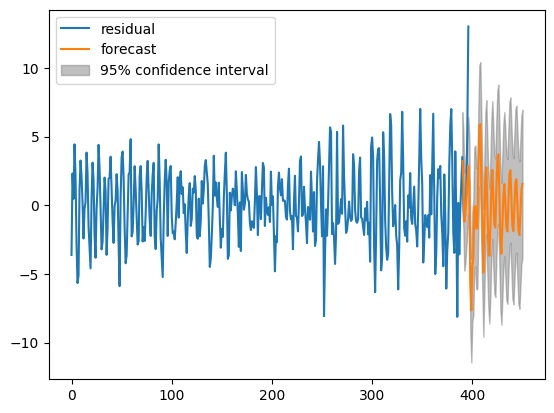

In [57]:
fig, ax = plt.subplots()
ax = New_DF['residual'].plot(ax=ax)
plot_predict(Model_AR,390,450, ax=ax)
plt.show()